In [11]:
#imports
import pandas as pd
from numpy.fft import fft
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

#read data
df_resampled = pd.read_csv('df_resampled.csv', index_col=0, parse_dates=True)

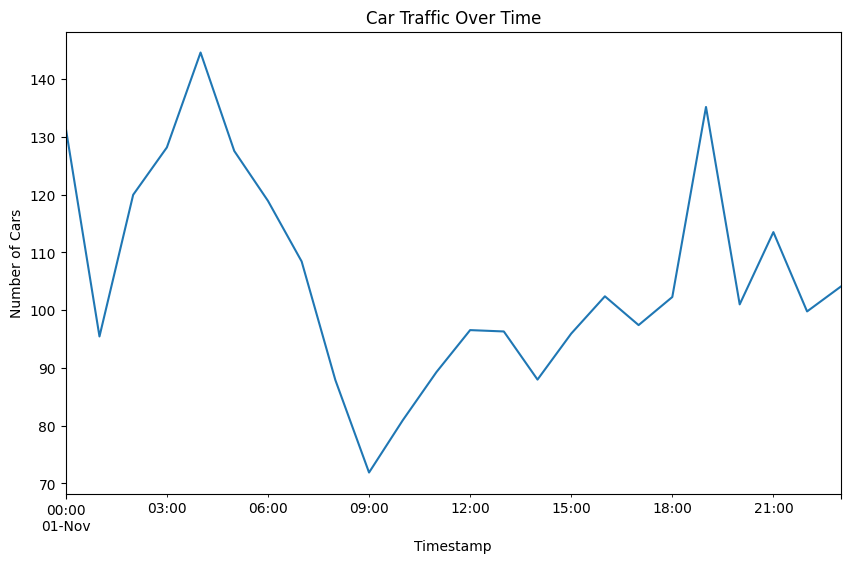

In [12]:
#visualize the data
df_resampled['car'].plot(figsize=(10, 6))
plt.title("Car Traffic Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Number of Cars")
plt.show()

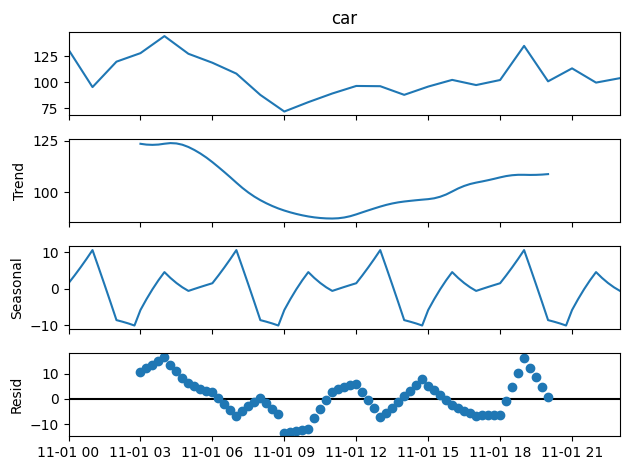

In [13]:
# Decompose the time series for 'car' traffic
decomposition = seasonal_decompose(df_resampled['car'], model='additive', period=24)

# Plot the decomposed components
decomposition.plot()
plt.show()

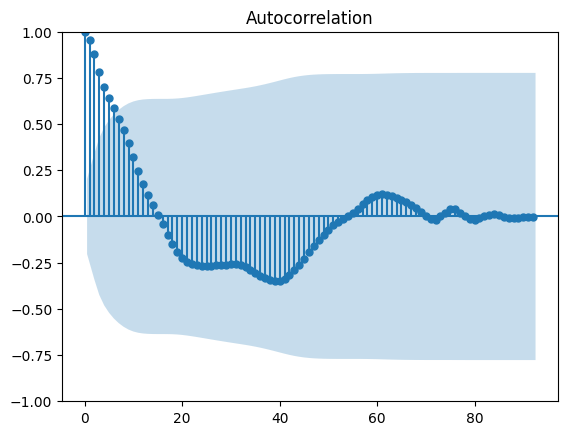

In [14]:
#autoconrelation
# Drop NaN values from 'car' traffic data
car_traffic = df_resampled['car'].dropna()

# Ensure the length of car_traffic is sufficient for the number of lags
max_lags = min(96, len(car_traffic) - 1)

# Plot Autocorrelation Function (ACF) for 'car' traffic (15-minute intervals)
plot_acf(car_traffic, lags=max_lags)
plt.show()

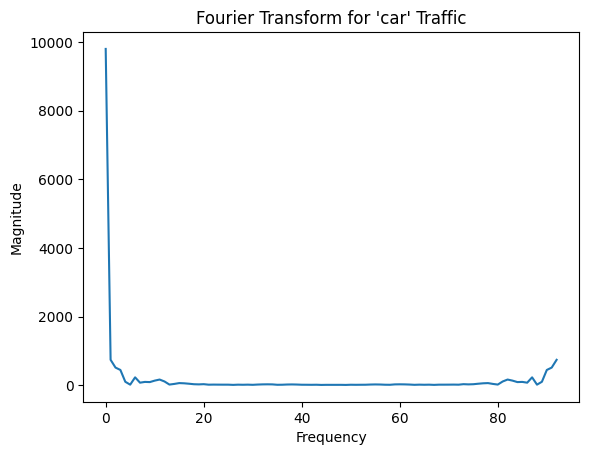

In [15]:
# Perform Fourier Transform
y = df_resampled['car'].dropna()
n = len(y)
freq = fft(y)

# Plot the absolute value of the frequency components
plt.plot(abs(freq))
plt.title("Fourier Transform for 'car' Traffic")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

In [16]:
#adf test
result = adfuller(df_resampled['car'].dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -2.3579936141210216
p-value: 0.15394495626131582
